In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Detecting Spam with Decision Trees

In this assignment you will detect spam with decision trees. It's always important to investigate the data that you are using for any project. Since data is our gold mine, it's our oil that powers our models we need to have good quality data. Machine learning follows the "garbage in, garbage out" principle, if we feed in bad data for training, we will get a model that produces bad results.  For these reasons we want to answer the following questions.

## 0.  Learn about the data

1. Where did this data come from?
2. Who made it?
3. How were the features selected?
4. Can you trust it?

Go ahead and scan through the spambase_features.txt file and the spambase.txt file.  These two files provide information about the dataset, how it was curated and where it came from. Then try to answer the above questions.


## 1. Load the data

In [2]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [3]:
## Load in the dataset here 

data = pd.read_csv('spambase/spambase.csv', names = names)
X = data.drop('label', axis = 1)
y = data.label

In [4]:
X.head(5)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


## 2. Preprocess the data if needed

1. Are there any empty values?
2. Do you need to transform the data?
3. What is the distribution of the positive and negative classes?
4. Split the data into training and testing sets

Let me give a few hints.  When it comes to scaling the data, we normally just _should_, but in this case we are going to be working with decision trees and I think we learned that they have an interesting property!  

We want to look at the distribution of positive (spam) and negative (ham) classes.  So basically we need to look at the count of the labels.  You can use the function `.value_counts()` on `y`.  Note that the function `value_counts` is specific to the Series class, it doesn't work on Dataframes.  Now it's not just enough to look at the raw numbers, I suggest you calculate statistics like "what percentage of my data is ham? What percentage is spam?  This may help you decide if you should use the `stratify` keyword when splitting your data.


In [5]:
data.isnull().any().sum()

0

In [6]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [7]:
data.label.sum()/data.shape[0]

0.39404477287546186

data.label.sum()/data.shape[0]

In [8]:
data.label.value_counts()

label
0    2788
1    1813
Name: count, dtype: int64

In [9]:
## Split your data with 70% for training, this is somewhat random.

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=.7, stratify=y)    

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

## 3. Train a Decision Tree Classifier

1. What metric should we use? The f1-score or accuracy?

Let's start with a default model, we won't specify any settings on the decision tree model for the first training. The following will be a 3-step process
 * training
 * getting predictions
 * evaluating our predictions
 
The question does arise, what should we check our predictions on? The obvious answer is that we should check the predictions on our testing set. That's the set of data that simulates our future unseen data. However in our quest to figure out if we are overfitting or not, it could be very useful to look at the performance of the training set.  Remember when we overfit our polynomials and they touched every point? But then we added data the performance would drop. Similarly if the perfomance of the training data is near perfect, but the testing data is much worse, that _gap_ indicates overfitting. So we will check both training and testing performance.


In [10]:
## Train the model
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
## get predictions from the model on the training data and the testing data
train_preds=dtc.predict(X_train)
test_preds=dtc.predict(X_test)


In [12]:
## evaluate the predictions
## Note that the order of the arguments is **very** important for f1-score

print(f"F1-score training is {f1_score(y_train, train_preds)} \n")
print(f"F1-score testing is {f1_score(y_test, test_preds)} \n")


F1-score training is 0.9996058336618052 

F1-score testing is 0.8870822041553749 



The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

## 4. Did we overfit? Either way, let's try out some of the decision tree parameters

Go ahead and try out some different tree parameters. 

* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

All three of these parameters will control the complexity of the tree.  Before you try them out, let's take a quick quiz:

* increasing `max_depth` will : **Increase** or **Decrease** overfitting?
* increasing `min_samples_split` will: **Increase** or **Decrease** overfitting?
* increasing `min_samples_leaf` will: **Increase** or **Decrease** overfitting?

It's very important to know the answer to these questions - because other wise you can't tune the parameters correctly. If you aren't sure go back and check the quiz on this very topic.

In [13]:
train_results = []
test_results = []
for i in range(2,50): # create a loop to check te impact
    
    dtc = DecisionTreeClassifier(max_depth=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                  # train the model
    train_preds=dtc.predict(X_train)
    test_preds=dtc.predict(X_test)
    train_results.append(f1_score(y_train, train_preds))
    test_results.append(f1_score(y_test, test_preds))                                  # get predictions for both training and test
                                     # evaluate them and append them into the our lists.

print(train_results)
print ( " ")
print (test_results)

[0.791975577845617, 0.8529287821323219, 0.8749470114455277, 0.8968944099378882, 0.9214026602176543, 0.9338742393509128, 0.9424547283702214, 0.9512, 0.9618320610687022, 0.9736211031175059, 0.9787915166066425, 0.9836457917830075, 0.98684734954165, 0.9880478087649402, 0.9896496815286624, 0.9900517309988062, 0.9912559618441972, 0.9920634920634921, 0.9932566441888139, 0.9940546967895363, 0.995249406175772, 0.9960443037974683, 0.9976303317535545, 0.9976303317535545, 0.999211356466877, 0.999211356466877, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052, 0.9996058336618052]
 
[0.7896311066799601, 0.8494208494208495, 0.851022395326

we can see the tendency in the training data that when we increse the depth of the model it becomes more complex and the result in training is higher but the test dosn`t go up`, we are overfitting.

## Plot the results of max depth

Let`s` try to plot the results so that we can see more clearly the impact of increasing the max_depth

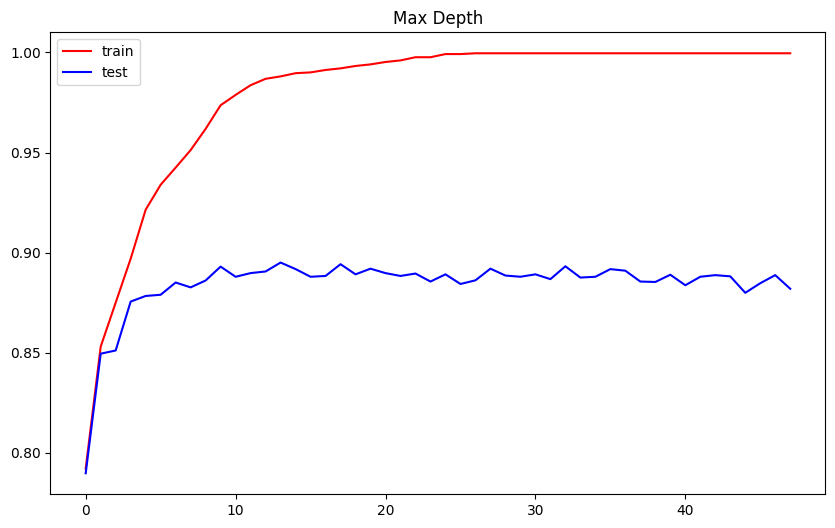

In [14]:
fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.set_title('Max Depth')
ax.legend()

By increasing the depth of the tree the training data fits better the but the test show bad results.
Seems that this is due to the overfitting of the function, we are overlooping in the testing data 
so the results are not accurate when testing

[0.9996058336618052, 0.995249406175772, 0.9908982983775227, 0.9873317498020586, 0.9853581321725365, 0.9829702970297028, 0.9785884218873909, 0.976559396106476, 0.9745627980922099, 0.9734021437078206, 0.9729514717581543, 0.9690230341540906, 0.9654898849662833, 0.9635210150674068, 0.9619349722442506, 0.9550695825049702, 0.953100158982512, 0.953100158982512, 0.9523431294678317, 0.9519650655021834, 0.9508982035928144, 0.9508982035928144, 0.9453815261044177, 0.944578313253012, 0.9378806333739342, 0.9378806333739342, 0.934640522875817, 0.9316517493897476, 0.9316517493897476, 0.9316517493897476, 0.9316517493897476, 0.9267294310274252, 0.9267294310274252, 0.9255928045789044, 0.9255928045789044, 0.9243353783231084, 0.9247135842880523, 0.9242734343020876, 0.9242734343020876, 0.9238952536824877, 0.9220672682526662, 0.9220672682526662, 0.9216892168921688, 0.9220672682526662, 0.9220672682526662, 0.9220672682526662, 0.9220672682526662, 0.9220672682526662]
 
[0.8862602365787079, 0.8901098901098901, 0.

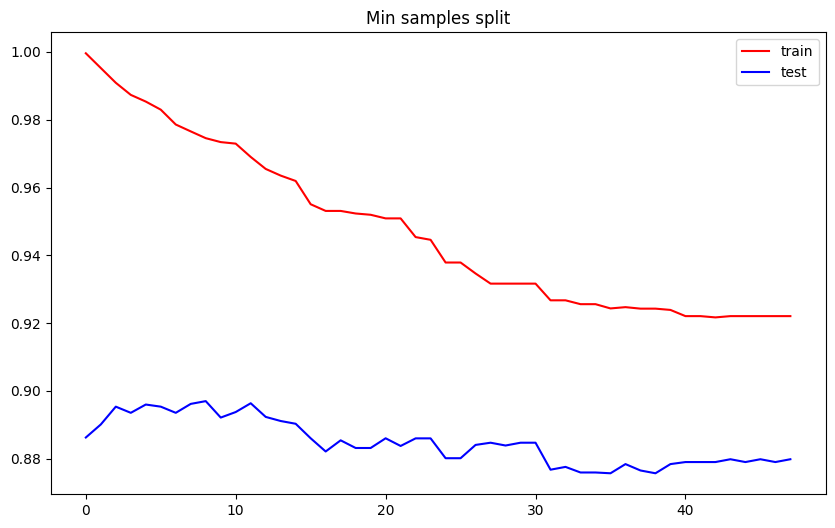

In [15]:
train_results = []
test_results = []
for i in range(2,50): # now min_samples_split
    
    dtc = DecisionTreeClassifier(min_samples_split=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                  # train the model
    train_preds=dtc.predict(X_train)
    test_preds=dtc.predict(X_test)
    train_results.append(f1_score(y_train, train_preds))
    test_results.append(f1_score(y_test, test_preds))                                  # get predictions for both training and test
                                     # evaluate them and append them into the our lists.

print(train_results)
print ( " ")
print (test_results)


fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.set_title('Min samples split')
ax.legend()

We see in this graph how by increasing the min samples split the accuracy of the training model drops because it becomes less deep the model by increasing the min samples split.
We need to choose a point in which the gap between the test line and test is small to avoid big differences

[0.9734513274336283, 0.9643987341772152, 0.951229343006852, 0.9492466296590009, 0.9436060365369342, 0.9405705229793978, 0.9356632247815727, 0.9289964299880998, 0.9250996015936255, 0.922341696535245, 0.9160613397901533, 0.9107215654300856, 0.9098327213382292, 0.9079054604726976, 0.9070146818923329, 0.8991803278688524, 0.8976052848885219, 0.8972659486329743, 0.8968089515126398, 0.8958938199917047, 0.8980761358984855, 0.8989858012170386, 0.899513776337115, 0.8990676935549251, 0.8995215311004784, 0.8982371794871795, 0.8977955911823647, 0.8970764917901483, 0.8972629908766362, 0.8984711877695022, 0.8984711877695022, 0.8984711877695022, 0.8984711877695022, 0.8971161340607949, 0.8967666536813401, 0.8994174757281554, 0.8994174757281554, 0.8994174757281554, 0.8994174757281554, 0.898989898989899, 0.8917851500789888, 0.8913472935598578, 0.8865414710485133, 0.8865414710485133, 0.8798418972332016, 0.8750508750508751, 0.86899918633035, 0.86899918633035]
 
[0.8701298701298702, 0.8797061524334251, 0.88

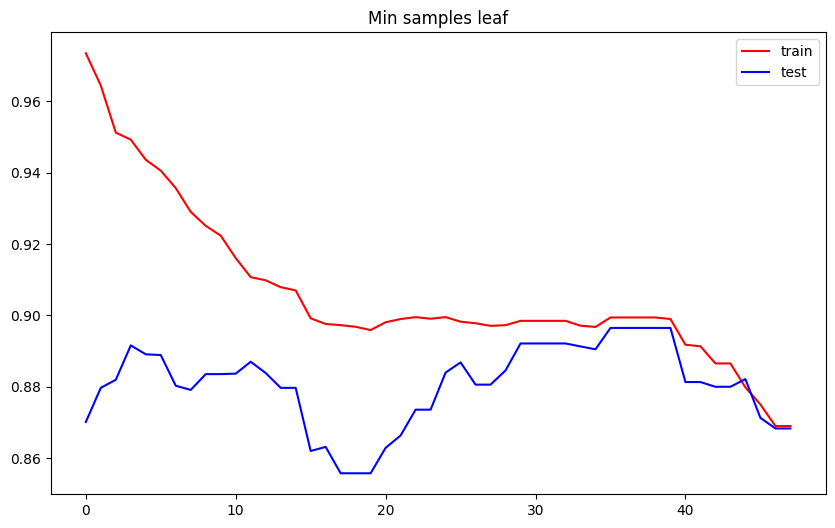

In [16]:
train_results = []
test_results = []
for i in range(2,50): 
    
    dtc = DecisionTreeClassifier(min_samples_leaf=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                  # train the model
    train_preds=dtc.predict(X_train)
    test_preds=dtc.predict(X_test)
    train_results.append(f1_score(y_train, train_preds))
    test_results.append(f1_score(y_test, test_preds))                                  # get predictions for both training and test
                                     # evaluate them and append them into the our lists.

print(train_results)
print ( " ")
print (test_results)


fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.set_title('Min samples leaf')
ax.legend()

In [ ]:
#we still need the validation part that will be explained later
#our performance its not good yet